<a href="https://colab.research.google.com/github/piyushgoel997/MutationClassification/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [0]:
import numpy as np
import pandas as pd
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv1D, BatchNormalization, GlobalMaxPooling1D
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

data_url = "https://raw.githubusercontent.com/piyushgoel997/MutationClassification/master/data.csv"

Load and process data to make matrix

In [2]:
def get_aa_encoder():
    """
    One-hot encoding indices for the 20 possible amino acids.
    :return: the dictionary mapping amino acid to index in the one-hot encoding.
    """
    acids = "ARNDCEQGHILKMFPSTWYV"
    indices = {}
    i = 0
    for a in acids:
        indices[a] = i
        i += 1
    return indices


def make_matrix(seq, alt):
    """
    makes a matrix where each of the 51 features correspond to the amino acid at
    that position in the sequence after the one-hot encoding using the indices
    provided. Also puts a -1 at in the middle most feature at the position
    corresponding to the alt amino acid.
    :param seq: the sequence to be encoded.
    :param alt: the alternate amino acid
    :return: the resultant encoded matrix (51 X 20)
    """
    indices = get_aa_encoder()
    matrix = np.zeros((len(indices), len(seq)))
    i = 0
    for s in seq:
        matrix[indices[s]][i] = 1
        i += 1
    matrix[indices[alt]][int(len(seq) / 2)] = -1
    return matrix.T


def map_description(description):
    map = {'Benign': 0, 'Benign/Likely benign': 0, 'Likely benign': 0,
           'Likely pathogenic': 1, 'Pathogenic': 1, 'Pathogenic/Likely pathogenic': 1}
    return map[description]


X = []
Y = []
mutations = pd.read_csv(data_url)

for _, row in mutations.iterrows():
    X.append(make_matrix(row["REF_SEQ"], row["ALT_AA"]))
    Y.append(map_description(row["DESCRIPTION"]))

X = np.array(X)
Y = np.array(Y)

X, Y = shuffle(X, Y)
# X_train = X[:int(0.6*X.shape[0])]
# Y_train = Y[:int(0.6*Y.shape[0])]
# X_val = X[int(0.6*X.shape[0]):int(0.8*X.shape[0])]
# Y_val = Y[int(0.6*Y.shape[0]):int(0.8*Y.shape[0])]
# X_test = X[int(0.8*X.shape[0]):]
# Y_test = Y[int(0.8*Y.shape[0]):]

# print("Training data shape", X_train.shape, "Training output shape", Y_train.shape)
# print("Validation data shape", X_val.shape, "Validation output shape", Y_val.shape)
# print("Testing data shape", X_test.shape, "Test output shape", Y_test.shape)

print("Input shape", X.shape, "\nOutput shape", Y.shape)

Training data shape (137701, 51, 20) Training output shape (137701,)
Validation data shape (45900, 51, 20) Validation output shape (45900,)
Testing data shape (45901, 51, 20) Test output shape (45901,)


In [0]:
def get_model(h=0):
  """
  make, compile and return the model
  :param h: The number of hidden layers with 64 channels to be added
  :return: the model
  """
  model = Sequential()
  model.add(Conv1D(32, kernel_size=3, activation="relu"))
  for _ in range(h):
    model.add(Conv1D(64, kernel_size=5, activation="relu"))
    model.add(BatchNormalization())
  model.add(Conv1D(32, kernel_size=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv1D(1, kernel_size=1, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPooling1D())
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
  return model

In [0]:
def k_fold_cross_validation(h, X, Y, k=10, do_roc=True, do_prc=True):
  """
  Make the model, train it, and validate it using k-fold cross validation.
  :param h: The number of hidden layers with 64 channels to be added in the model.
  :param X: input to the model.
  :param Y: expected outputs of the model.
  :return: model, model_history, average accuracy, average auc, k roc curve coordinates, k prc curve coordinates
  """
  

In [9]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/2
4304/4304 [==============================] - 27s 6ms/step - loss: 0.1348 - accuracy: 0.8267 - val_loss: 0.0943 - val_accuracy: 0.8718
Epoch 2/2
4304/4304 [==============================] - 27s 6ms/step - loss: 0.0869 - accuracy: 0.8796 - val_loss: 0.0819 - val_accuracy: 0.8838


In [10]:
model.evaluate(X_test, Y_test)

1435/1435 [==============================] - 3s 2ms/step - loss: 0.0834 - accuracy: 0.8814


[0.08339471369981766, 0.8814405202865601]

In [11]:
model.metrics_names

['loss', 'accuracy']

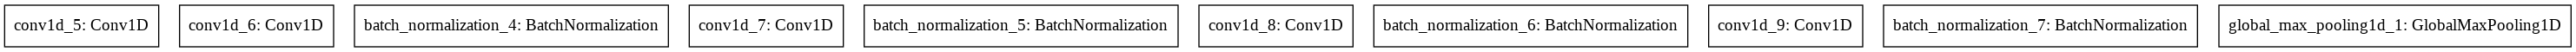

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [15]:
history.history

{'accuracy': [0.826660692691803, 0.8796014785766602],
 'loss': [0.13480739295482635, 0.08688391000032425],
 'val_accuracy': [0.8718082904815674, 0.8838344216346741],
 'val_loss': [0.09431898593902588, 0.08194494247436523]}

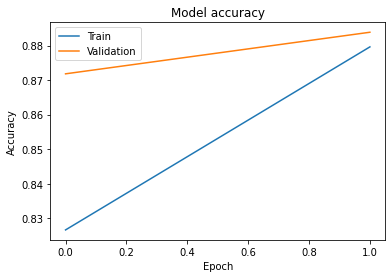

In [17]:
import matplotlib.pyplot as plt

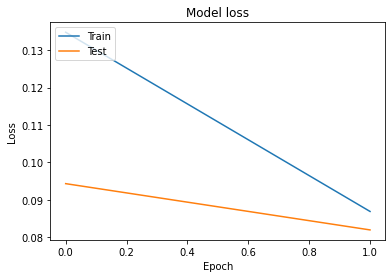

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
test_out = model.predict(X_test)

In [20]:
test_out

array([[ 0.05746603],
       [ 0.30769253],
       [ 0.0223074 ],
       ...,
       [ 0.00647068],
       [-0.00467253],
       [-0.00631499]], dtype=float32)

In [0]:
fpr, tpr, _ = roc_curve(Y_test, test_out)

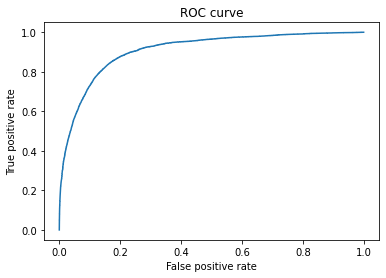

AUC 0.90849367367117


In [31]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print("AUC", auc(fpr, tpr))

In [0]:
p, r, _ = precision_recall_curve(Y_test, test_out)

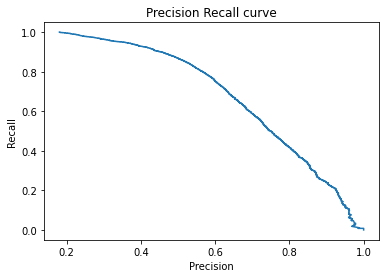

In [35]:
plt.plot(p, r)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall curve')
plt.show()

ValueError: ignored